In [1]:
import pandas as pd
import preprocessor as p
import matplotlib
import nltk
import re
import math

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from datetime import datetime

tweets = pd.read_csv('tweets_election_df_v2.csv')
tweets.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/givepeazachance/status/143...,2021-09-19 23:59:55+00:00,PR would mean PPC sitting at the table and for...,PR would mean PPC sitting at the table and for...,1439741072314408966,"{'_type': 'snscrape.modules.twitter.User', 'us...",26,35,141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Elxn44', 'cdnpoli']",NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/JacobMcCourt/status/143974...,2021-09-19 23:59:50+00:00,Tomorrow is #elxn44vote in Canada. \n\nRemembe...,Tomorrow is #elxn44vote in Canada. \n\nRemembe...,1439741052039139328,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['elxn44vote', 'cdnpoli']",NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/picardonhealth/status/1439...,2021-09-19 23:59:47+00:00,Why do we still have to fight for basic #acces...,Why do we still have to fight for basic #acces...,1439741039237943301,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,5,15,...,NaN,NaN,NaN,1.439619e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['accessibility', 'disability', 'inclusion', '...",NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/ShaneWenzel/status/1439740...,2021-09-19 23:59:29+00:00,Do you think your cost of living has improved ...,Do you think your cost of living has improved ...,1439740962264076292,"{'_type': 'snscrape.modules.twitter.User', 'us...",37,264,163,...,NaN,NaN,NaN,NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...","['cdnpoli', 'Elxn44']",NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/AnthonyNCentre/status/1439...,2021-09-19 23:59:26+00:00,Great seeing ⁦@JustinTrudeau⁩ today in #niagar...,Great seeing ⁦@JustinTrudeau⁩ today in #niagar...,1439740949727490050,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,13,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['niagarafalls', 'elxn44', 'cdnpoli', 'forward...",NaN


In [2]:
tweets = tweets[['content']]
tweets.head()

,content
0,PR would mean PPC sitting at the table and for...
1,Tomorrow is #elxn44vote in Canada. \n\nRemembe...
2,Why do we still have to fight for basic #acces...
3,Do you think your cost of living has improved ...
4,Great seeing ⁦@JustinTrudeau⁩ today in #niagar...


In [3]:
def preprocess_tweet(row):
    text = row['content']
    text = p.clean(text)
    return text

tweets['Normal_Text'] = tweets.apply(preprocess_tweet, axis=1)
tweets.head()
tweets = tweets.dropna()

#Removing stopwords
stop = stopwords.words('english')
tweets['Clean_Tweet'] = tweets['Normal_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lowercasing the tweets:
for i in range(len(tweets)):
    tweets['Clean_Tweet'][i] = tweets['Clean_Tweet'][i].lower()
    
#Removing punctuation:
import string
def remove_punct(txt):
    text_nopunct= "".join([char for char in txt if char not in string.punctuation])
    return text_nopunct
tweets['Finished_Tweet']= tweets['Clean_Tweet'].apply(lambda x: remove_punct(x))


#Tokenizing into words:
    
tweets['tokenized_tweet'] = 0
for i in range(len(tweets)):
    tweets['tokenized_tweet'][i] = word_tokenize(tweets['Finished_Tweet'][i])
    
tweets.head()

/var/folders/1c/ggccb2c123ndgb2d4lvtql_h0000gn/T/ipykernel_89122/4279015864.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['tokenized_tweet'][i] = word_tokenize(tweets['Finished_Tweet'][i])
/Users/mohamadkhalili/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,content,Normal_Text,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,PR would mean PPC sitting at the table and for...,PR would mean PPC sitting at the table and for...,pr would mean ppc sitting table forming coalit...,pr would mean ppc sitting table forming coalit...,"[pr, would, mean, ppc, sitting, table, forming..."
1,Tomorrow is #elxn44vote in Canada. \n\nRemembe...,"Tomorrow is in Canada. Remember to vote, pleas...","tomorrow canada. remember vote, please. its fo...",tomorrow canada remember vote please its found...,"[tomorrow, canada, remember, vote, please, its..."
2,Why do we still have to fight for basic #acces...,Why do we still have to fight for basic ? by via,why still fight basic ? via,why still fight basic via,"[why, still, fight, basic, via]"
3,Do you think your cost of living has improved ...,Do you think your cost of living has improved ...,do think cost living improved worsened last ye...,do think cost living improved worsened last ye...,"[do, think, cost, living, improved, worsened, ..."
4,Great seeing ⁦@JustinTrudeau⁩ today in #niagar...,Great seeing today in . Hes so inspiring and h...,great seeing today . hes inspiring clear visio...,great seeing today hes inspiring clear vision...,"[great, seeing, today, hes, inspiring, clear, ..."


In [4]:
indices_to_drop = []
for i in range(len(tweets)):
    if len(tweets.tokenized_tweet[i]) == 0:
        indices_to_drop.append(tweets.index[i])

tweets = tweets.drop(indices_to_drop)
tweets = tweets.reset_index(drop = True)
tweets.head()

,content,Normal_Text,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,PR would mean PPC sitting at the table and for...,PR would mean PPC sitting at the table and for...,pr would mean ppc sitting table forming coalit...,pr would mean ppc sitting table forming coalit...,"[pr, would, mean, ppc, sitting, table, forming..."
1,Tomorrow is #elxn44vote in Canada. \n\nRemembe...,"Tomorrow is in Canada. Remember to vote, pleas...","tomorrow canada. remember vote, please. its fo...",tomorrow canada remember vote please its found...,"[tomorrow, canada, remember, vote, please, its..."
2,Why do we still have to fight for basic #acces...,Why do we still have to fight for basic ? by via,why still fight basic ? via,why still fight basic via,"[why, still, fight, basic, via]"
3,Do you think your cost of living has improved ...,Do you think your cost of living has improved ...,do think cost living improved worsened last ye...,do think cost living improved worsened last ye...,"[do, think, cost, living, improved, worsened, ..."
4,Great seeing ⁦@JustinTrudeau⁩ today in #niagar...,Great seeing today in . Hes so inspiring and h...,great seeing today . hes inspiring clear visio...,great seeing today hes inspiring clear vision...,"[great, seeing, today, hes, inspiring, clear, ..."


In [5]:
def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
  
get_most_freq_words([ word for tweet in tweets.tokenized_tweet for word in tweet],100)

[('amp', 1478),
 ('the', 1378),
 ('this', 1146),
 ('vote', 1145),
 ('election', 1038),
 ('canada', 1034),
 ('trudeau', 977),
 ('people', 918),
 ('like', 816),
 ('party', 775),
 ('get', 718),
 ('otoole', 700),
 ('ndp', 681),
 ('it', 669),
 ('would', 640),
 ('one', 597),
 ('canadians', 584),
 ('cpc', 582),
 ('you', 580),
 ('liberal', 565),
 ('we', 546),
 ('us', 545),
 ('need', 544),
 ('time', 509),
 ('liberals', 505),
 ('conservative', 497),
 ('government', 486),
 ('if', 486),
 ('want', 456),
 ('know', 455),
 ('right', 453),
 ('federal', 448),
 ('campaign', 440),
 ('canadian', 440),
 ('not', 434),
 ('dont', 428),
 ('and', 420),
 ('its', 417),
 ('think', 408),
 ('see', 407),
 ('erin', 399),
 ('going', 389),
 ('make', 385),
 ('good', 379),
 ('conservatives', 378),
 ('plan', 367),
 ('cant', 354),
 ('im', 353),
 ('many', 348),
 ('so', 343),
 ('support', 342),
 ('day', 342),
 ('voting', 341),
 ('care', 337),
 ('no', 329),
 ('lpc', 329),
 ('leader', 328),
 ('climate', 326),
 ('candidate', 325)

In [75]:
# Removing other words that create noise
words = ['amp',
         'people',
         'it',
         'in',
         'the',
         'this',
         'that',
         'thats',
         'their',
         'dont',
         'why',
         'i',
         'us',
         'go',
         'im',
         'how',
         'is',
         'canada',
         'canadas',
         'canadian',
         'canadians',
         'th',
         'to',
         'please',
         'vote',
         'votes',
         'voted',
         'voting',
         'also',
         'could',
         'now',
         'see',
         'take',
         'said',
         'and',
         'you',
         'we',
         'day',
         'de',
         'never',
         'so',
         'even',
         'what',
         'its',
         'if',
         'he',
         'hes',
         'get',
         'gets',
         'la',
         'no',
         'can',
         'cant',
         'one',
         'new',
         'time',
         'like',
         'two',
         'much',
         'back',
         'even',
         'going',
         'way',
         'could',
         'well',
         'make',
         'not',
        'thats',
        'theyre',
        'theyve',
        'they',
        's',
        'a',
        'seek',
        'sense',
        'want',
        'out',
        'checking',
        'and',
        'retweet',
        'being',
        'need',
        'needs',
        'think',
        'thinks',
        'years',
        'year',
        'say',
        'says',
        'in',
        'even',
        'would',
        'wouldnt',
        'does',
        'doesnt',
        'via',
        'election',
        'elections',
        'federal',
        'le',
        'les',
        'des',
        'pour',
        'en',
        'que',
        'thread',
        'do',
        'here',
        'still',
        'who',
        'know',
        'knows',
        'party',
        'still',
        'oh',
        'hey',
        'candidate',
        'campaign',
        'long',
        'find',
        'na',
        'thing',
        'things',
        'too',
        'et',
        'every',
        'for',
        'yes']

In [76]:
for i in range(len(tweets)):
    tweets.tokenized_tweet[i] = [x for x in tweets.tokenized_tweet[i] if x not in words]

tweets.head()

,content,Normal_Text,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,PR would mean PPC sitting at the table and for...,PR would mean PPC sitting at the table and for...,pr would mean ppc sitting table forming coalit...,pr would mean ppc sitting table forming coalit...,"[pr, mean, ppc, sitting, table, forming, coali..."
1,Tomorrow is #elxn44vote in Canada. \n\nRemembe...,"Tomorrow is in Canada. Remember to vote, pleas...","tomorrow canada. remember vote, please. its fo...",tomorrow canada remember vote please its found...,"[tomorrow, remember, foundation, democracy]"
2,Why do we still have to fight for basic #acces...,Why do we still have to fight for basic ? by via,why still fight basic ? via,why still fight basic via,"[fight, basic]"
3,Do you think your cost of living has improved ...,Do you think your cost of living has improved ...,do think cost living improved worsened last ye...,do think cost living improved worsened last ye...,"[cost, living, improved, worsened, last, comme..."
4,Great seeing ⁦@JustinTrudeau⁩ today in #niagar...,Great seeing today in . Hes so inspiring and h...,great seeing today . hes inspiring clear visio...,great seeing today hes inspiring clear vision...,"[great, seeing, today, inspiring, clear, visio..."


In [77]:
tweets_dictionary = Dictionary(tweets.tokenized_tweet)

In [78]:
tweets_corpus = [tweets_dictionary.doc2bow(tweet) for tweet in tweets.tokenized_tweet]

In [10]:
#tweets_coherence = []
#for nb_topics in range(1,15):
#    lda = LdaModel(tweets_corpus, num_topics = nb_topics, id2word = tweets_dictionary, passes=10)
#    cohm = CoherenceModel(model=lda, corpus=tweets_corpus, dictionary=tweets_dictionary, coherence='u_mass')
#    coh = cohm.get_coherence()
#    tweets_coherence.append(coh)

# visualize coherence
#plt.figure(figsize=(10,5))
#plt.plot(range(1,15),tweets_coherence)
#plt.xlabel("Number of Topics")
#plt.ylabel("Coherence Score");

In [11]:
#k = 4
#tweets_lda = LdaModel(tweets_corpus, num_topics = k, id2word = tweets_dictionary, passes=10)

#def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
#    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
#    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

#    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
#    gs.update(wspace=0.5, hspace=0.5)
#    plt.figure(figsize=(20,15))
#    for i in range(nb_topics):
#        ax = plt.subplot(gs[i])
#        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
#        ax.invert_yaxis()
#        ax.set_yticks(range(nb_words))
#        ax.set_yticklabels(top_words[i][:nb_words])
#        plt.title("Topic "+str(i))

In [12]:
#from matplotlib import gridspec
#plot_top_words()

# Topic Modelling

In [95]:
import gensim
from gensim.models import ldamulticore
from pprint import pprint
from gensim.models import coherencemodel

for k in range(2,20): # Train LDA on different values of k
    print('Round: '+str(k))
    LDA = gensim.models.ldamulticore.LdaMulticore
    ldamodel = LDA(tweets_corpus, num_topics=k, id2word = tweets_dictionary, passes=20, iterations=100,
                   chunksize = 10000, eval_every = 10, random_state=0)
    ldamodel.save(f"ldamodel_for_{k}topics_Run_10")
    pprint(ldamodel.print_topics())

Round: 2
[(0,
  '0.009*"ndp" + 0.008*"cpc" + 0.005*"lpc" + 0.003*"trudeau" + 0.003*"alberta" '
  '+ 0.003*"liberal" + 0.003*"minister" + 0.003*"conservative" + '
  '0.003*"government" + 0.003*"conservatives"'),
 (1,
  '0.007*"trudeau" + 0.007*"otoole" + 0.004*"right" + 0.004*"erin" + '
  '0.003*"liberal" + 0.003*"liberals" + 0.003*"plan" + 0.003*"climate" + '
  '0.003*"care" + 0.003*"conservative"')]
Round: 3


/Users/mohamadkhalili/opt/anaconda3/lib/python3.8/site-packages/smart_open/smart_open_lib.py:400: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  warnings.warn(


[(0,
  '0.014*"ndp" + 0.011*"cpc" + 0.008*"lpc" + 0.005*"bq" + 0.004*"conservative" '
  '+ 0.004*"liberal" + 0.004*"gpc" + 0.004*"vaccine" + 0.004*"seats" + '
  '0.003*"support"'),
 (1,
  '0.009*"otoole" + 0.005*"erin" + 0.005*"trudeau" + 0.005*"right" + '
  '0.004*"debate" + 0.004*"liberals" + 0.004*"climate" + 0.004*"conservative" '
  '+ 0.003*"liberal" + 0.003*"plan"'),
 (2,
  '0.011*"trudeau" + 0.004*"government" + 0.003*"good" + 0.003*"conservatives" '
  '+ 0.003*"liberal" + 0.003*"tax" + 0.003*"justin" + 0.003*"care" + '
  '0.003*"pm" + 0.003*"health"')]
Round: 4
[(0,
  '0.018*"ndp" + 0.014*"cpc" + 0.012*"lpc" + 0.006*"bq" + 0.005*"gpc" + '
  '0.005*"seats" + 0.005*"conservative" + 0.004*"liberal" + 0.003*"since" + '
  '0.003*"alberta"'),
 (1,
  '0.009*"otoole" + 0.005*"erin" + 0.005*"trudeau" + 0.005*"conservative" + '
  '0.004*"right" + 0.004*"leader" + 0.004*"liberals" + 0.004*"liberal" + '
  '0.003*"climate" + 0.003*"plan"'),
 (2,
  '0.011*"trudeau" + 0.004*"tax" + 0.004*"jus

In [96]:
coherence = []
for k in range(2,20):
    LDA = gensim.models.ldamulticore.LdaMulticore
    ldamodel = LDA.load(f"ldamodel_for_{k}topics_Run_10")
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=tweets.tokenized_tweet, dictionary=tweets_dictionary, coherence='c_v')
    coherence.append((k, 'default', 'default', cm.get_coherence()))

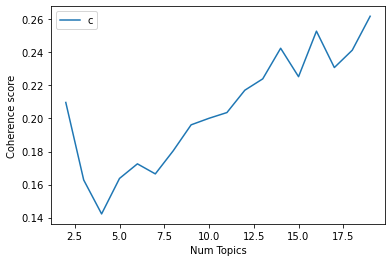

In [97]:
pd.DataFrame(coherence, columns=['LDA_Model','alpha','eta','coherence_score']).to_csv('coherence_matrix_10.csv', index=False)
mat = pd.read_csv('coherence_matrix_10.csv')
mat.reset_index(drop=True)
# Show graph
x = range(2,20)
plt.plot(x, mat['coherence_score'])
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [98]:
#Max is reached at 13 topics
k = 16
tweets_lda = LDA(tweets_corpus, num_topics = k, id2word = tweets_dictionary, passes=30)

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(25,20))
    
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))      

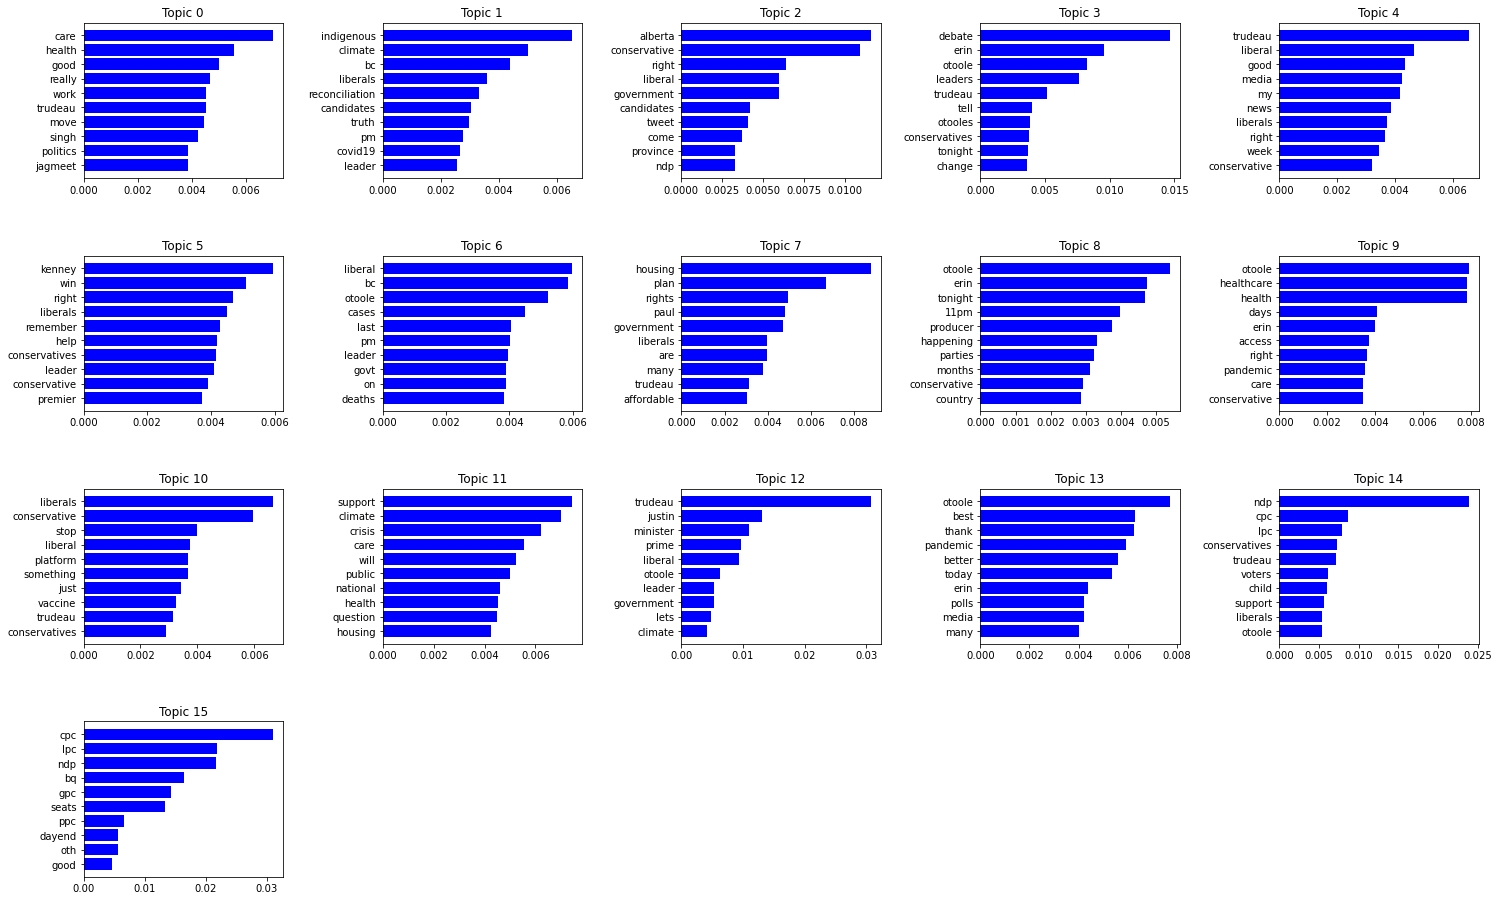

In [99]:
plot_top_words()